In [1]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('data1.csv', skiprows=[0], encoding = 'ISO-8859-1')

In [5]:
data.head()

,Angle [°],% Gait Cycle,Natural,Unnamed: 3,Unnamed: 4,XS,Unnamed: 6,Unnamed: 7,S,Unnamed: 9,...,Unnamed: 46,Heel.1,Unnamed: 48,Unnamed: 49,Ascending.1,Unnamed: 51,Unnamed: 52,Descending.1,Unnamed: 54,Unnamed: 55
0,Pelvic Ant/Posterior Tilt,0%,-7.3,-2.8,1.6,-7.2,-3.7,-0.2,-7.1,-2.6,...,-6.7,-21.4,-14.7,-8.0,-18.0,-11.7,-5.4,-15.9,-9.2,-2.5
1,Pelvic Ant/Posterior Tilt,1%,-7.2,-2.8,1.6,-7.2,-3.7,-0.3,-7.0,-2.6,...,-6.7,-21.3,-14.6,-8.0,-18.3,-12.0,-5.7,-15.9,-9.2,-2.5
2,Pelvic Ant/Posterior Tilt,2%,-7.2,-2.8,1.6,-7.2,-3.8,-0.4,-7.0,-2.6,...,-6.8,-21.3,-14.7,-8.1,-18.6,-12.3,-6.0,-16.0,-9.3,-2.6
3,Pelvic Ant/Posterior Tilt,3%,-7.2,-2.7,1.7,-7.2,-3.8,-0.4,-7.0,-2.6,...,-6.9,-21.4,-14.8,-8.3,-19.0,-12.7,-6.4,-16.1,-9.4,-2.7
4,Pelvic Ant/Posterior Tilt,4%,-7.1,-2.7,1.7,-7.2,-3.8,-0.5,-7.0,-2.6,...,-7.0,-21.4,-15.0,-8.5,-19.5,-13.1,-6.7,-16.2,-9.5,-2.8


In [6]:
def modify(data):
    col = ["Natural", "XS", "S", "M", "L", "Toe", "Heel", "Ascending", "Descending"]
    m1 = 3
    m2 = 1
    m3 = 1
    d = {}
    r = data.columns[0]
    for i in col:
        s1 = "Unnamed: " + str(m1)
        s2 = "Unnamed: " + str(m1+1)
        data[i] = (data[i] + data[s1] + data[s2])/3
        data.drop([s1, s2], axis = 1, inplace = True)
        m1 += 3
    for i in col:
        a = i + "." + str(m2)
        s1 = "Unnamed: " + str(m1)
        s2 = "Unnamed: " + str(m1+1)
        data[i] = (data[i] + data[s1] + data[s2])/3
        data.drop([s1, s2], axis = 1, inplace = True)
        m1 += 3
        m2 += 1
    for i in data[r].unique():
        d[i]  = m3
        m3 += 1
#     print(d)
    data[r] = data[r].map(d)
    data['% Gait Cycle'] = data['% Gait Cycle'].apply(lambda x : int(x.split('%')[0]))
    return data

In [12]:
d = modify(data.copy())
d.head()

,Angle [°],% Gait Cycle,Natural,XS,S,M,L,Toe,Heel,Ascending,Descending,Natural.1,XS.1,S.1,M.1,L.1,Toe.1,Heel.1,Ascending.1,Descending.1
0,1,0,-4.811111,-5.400000,-4.300000,-5.133333,-8.511111,-8.700000,-10.200000,-6.788889,-4.700000,-16.4,-15.7,-16.9,-14.6,-17.3,-19.0,-21.4,-18.0,-15.9
1,1,1,-4.866667,-5.477778,-4.300000,-5.166667,-8.488889,-8.644444,-10.133333,-7.133333,-4.766667,-16.4,-15.9,-16.9,-14.7,-17.3,-19.0,-21.3,-18.3,-15.9
2,1,2,-4.933333,-5.600000,-4.366667,-5.244444,-8.577778,-8.644444,-10.166667,-7.477778,-4.900000,-16.5,-16.1,-17.0,-14.8,-17.3,-18.9,-21.3,-18.6,-16.0
3,1,3,-4.977778,-5.666667,-4.400000,-5.288889,-8.722222,-8.688889,-10.266667,-7.911111,-5.000000,-16.7,-16.3,-17.1,-15.0,-17.4,-18.8,-21.4,-19.0,-16.1
4,1,4,-5.000000,-5.711111,-4.433333,-5.333333,-8.800000,-8.711111,-10.366667,-8.300000,-5.111111,-16.7,-16.3,-17.2,-15.0,-17.4,-18.8,-21.4,-19.5,-16.2


In [17]:
d = modify(data.copy())
young_data = d.copy()
adult_data = d.copy()
col = ["Natural", "XS", "S", "M", "L", "Toe", "Heel", "Ascending", "Descending"]
for i in col:
    young_data.drop(i+".1", axis = 1, inplace = True)
    adult_data[i] = adult_data[i+".1"]
    adult_data.drop(i+".1", axis = 1, inplace = True)
young_data["Target"] = "Young"
adult_data["Target"] = "Adult"

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

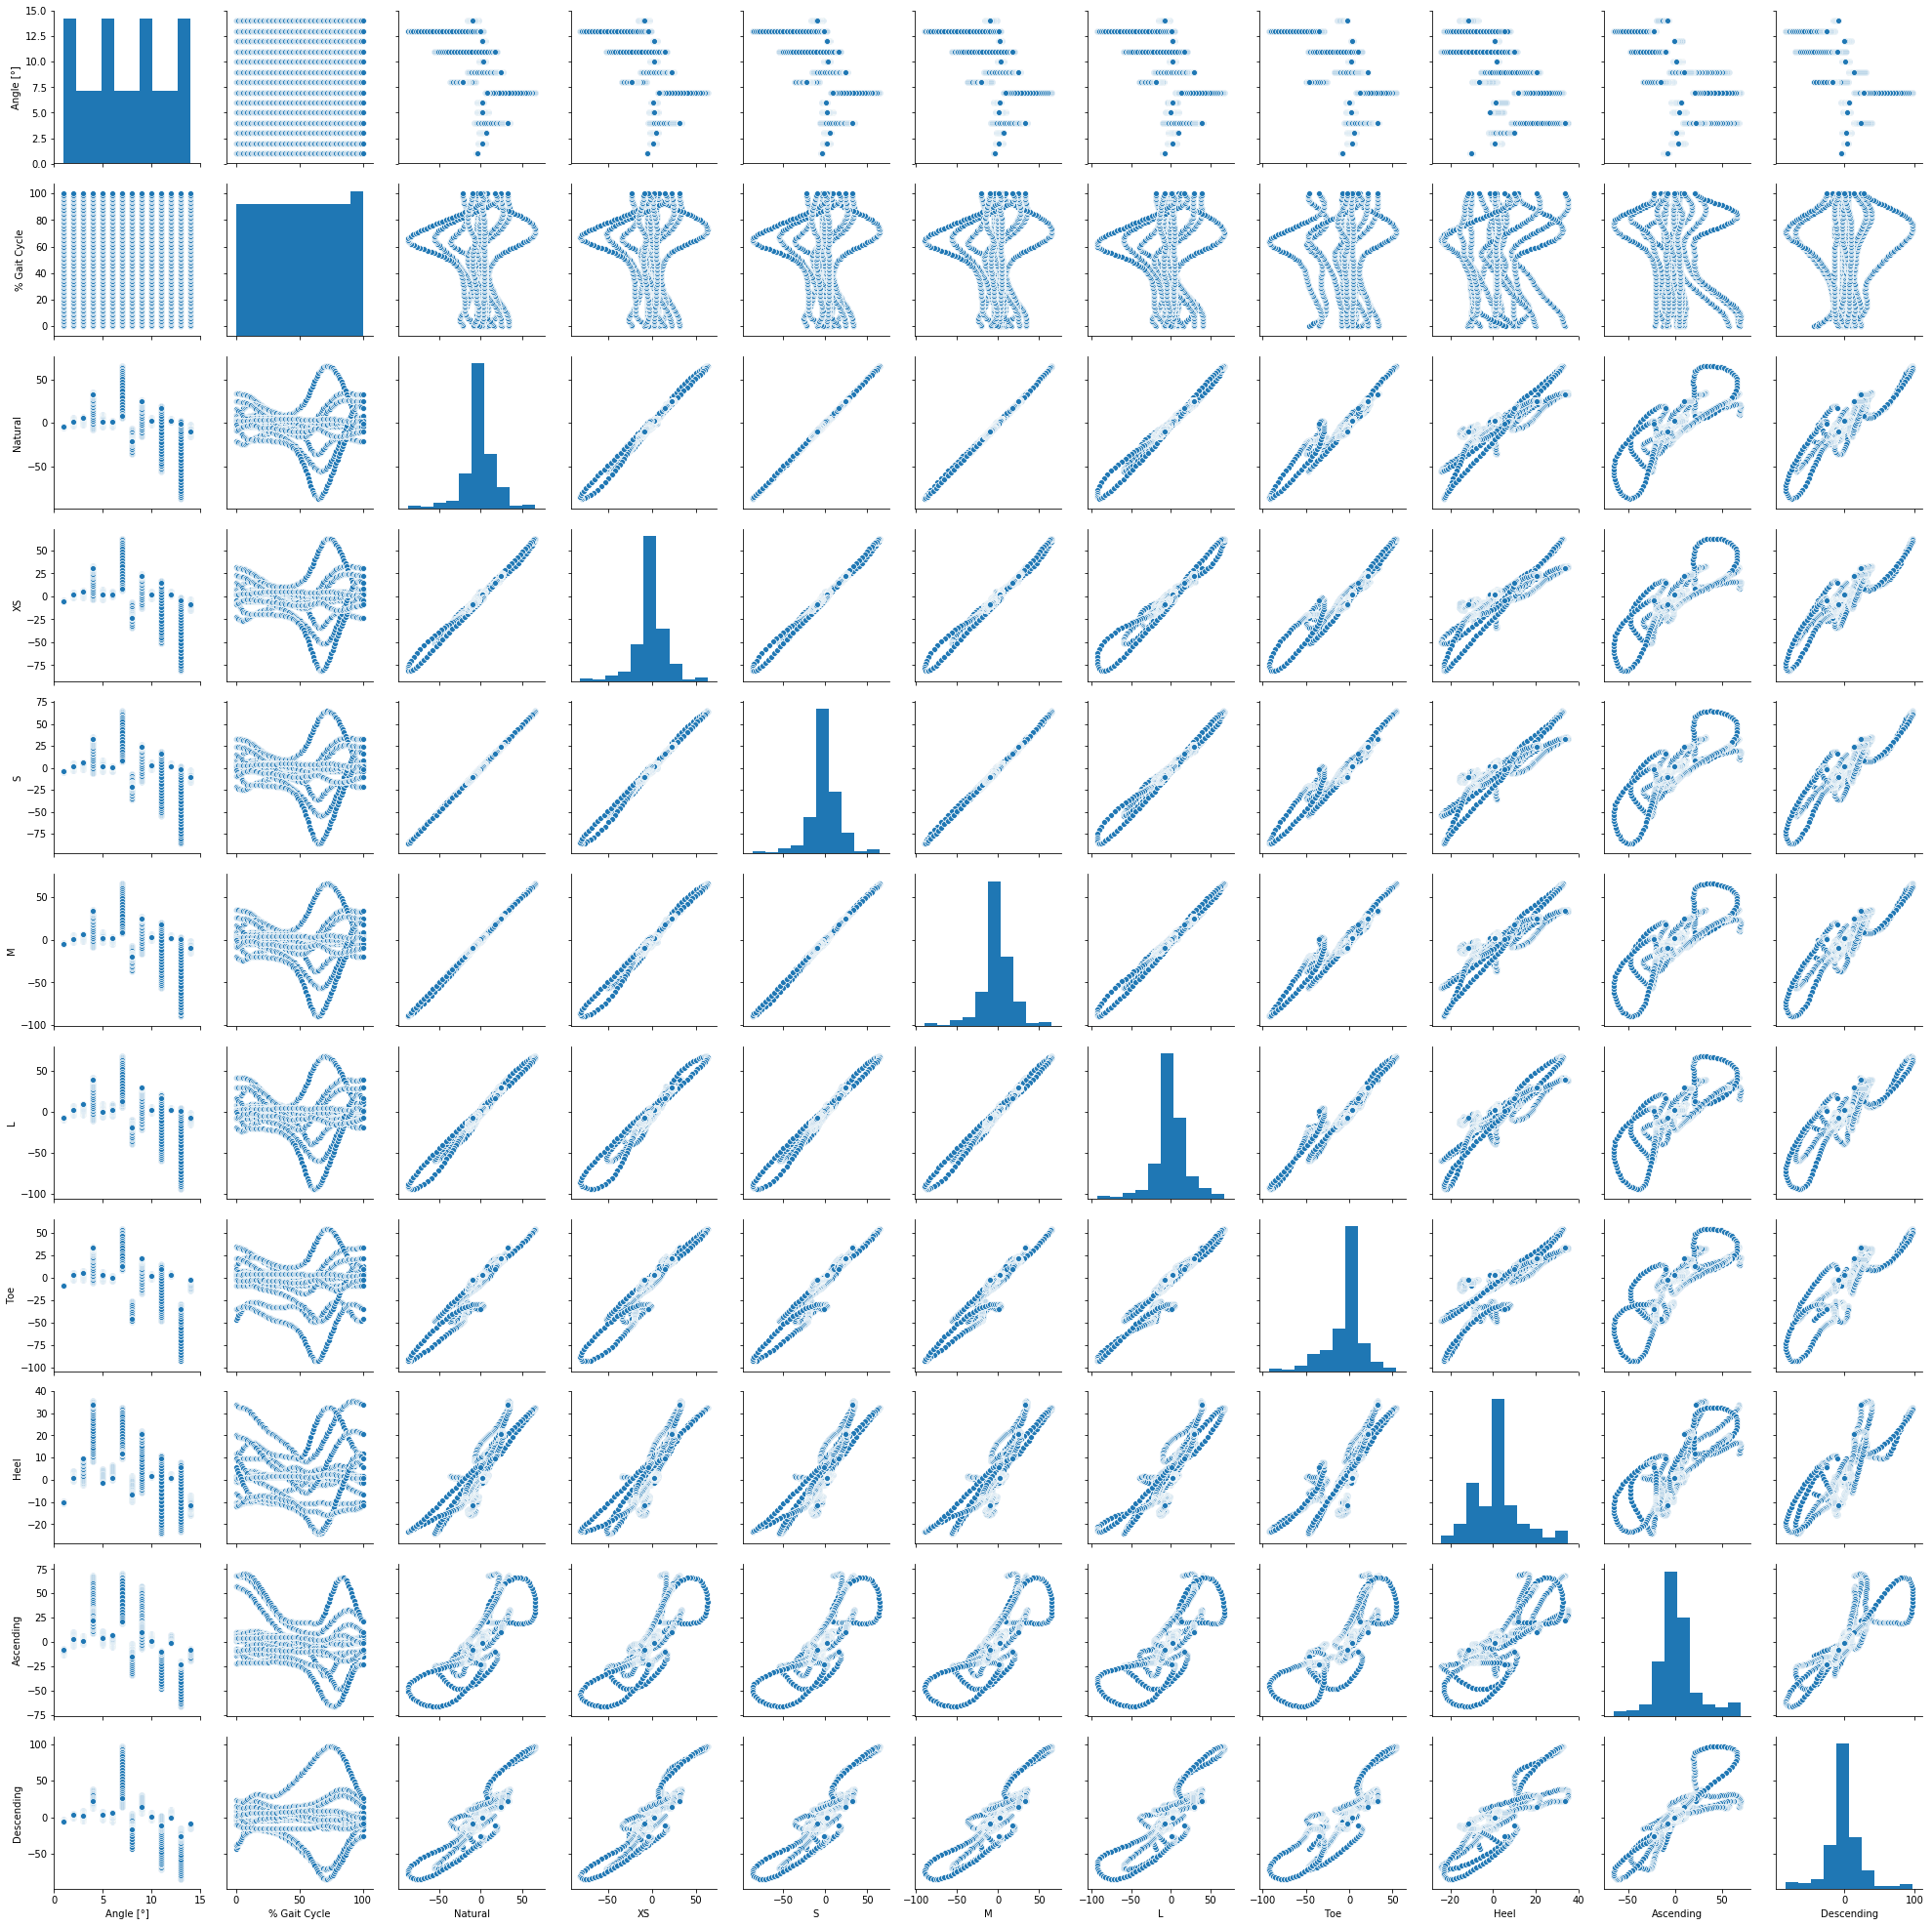

In [18]:
sns.pairplot(young_data)